# Chapter 2: Non-parametric estimation - part 2: improved periodogram-based methods

This Jupyter notebook continues the study of non-parametric spectral estimation by looking at improved techniques based on the periodogram. The focus will be on Barlett's and Welch's methods.


## Barlett's method - white noise


**[HAY96, Example 8.2.5, p. 415]** Let 𝑋(n) be a zero-mean unit-power white noise. This random process and its PSD were studied in **[Chapter 2 tutorial, problem 2.6]**.


* Generate 50 realizations of $N = 512$ samples of process $X(n)$. Plot one realization.


* Compute Bartlett's spectral estimator (in dB) of each realization, taking a single segment ($K = 1$). Superimpose the 50 spectral realizations in the same figure, with $\omega$ in the interval $[0, \pi]$ rad/sample.


* Compute the average spectral estimate and plot it (in dB) in a different figure. Compare the average with the theoretical PSD of the white random process considered in this exercise.


* Compute and plot (in dB) the variance of the spectral realizations. Compute the average variance over the whole frequency range.


* Repeat the exercice by using $K = 4$ sections of $L = 128$ samples, and then $K = 8$ sections of length $L = 64$ samples.


* *Conclude:* What is the effect of the number of sections on the bias and variance of Bartlett's spectral estimate? How do these performance measures compare to those of the periodogram? 



*Hint:* Use $N_\mathrm{FFT} = 1024$ points to compute the periodogram.

<ipython-input-16-89d604e8ed4c>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(N), x[1,:])


 - average variance over all frequencies = -0.29 dB
 - average variance over all frequencies = -6.3 dB
 - average variance over all frequencies = -9.38 dB


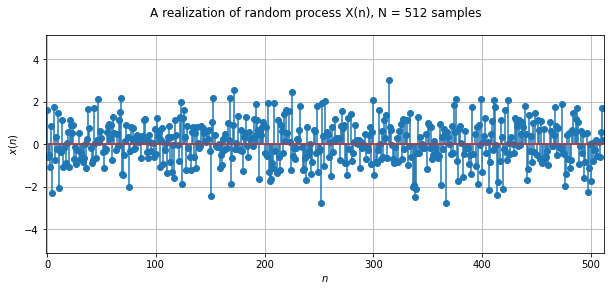

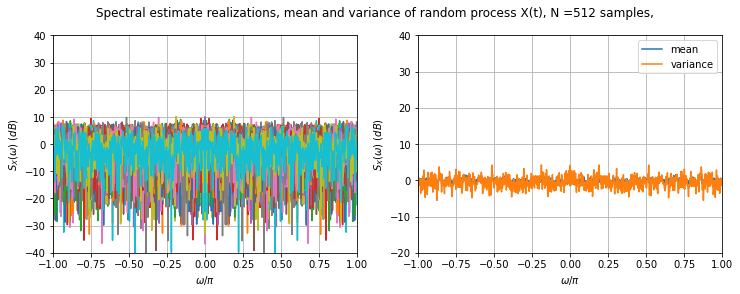

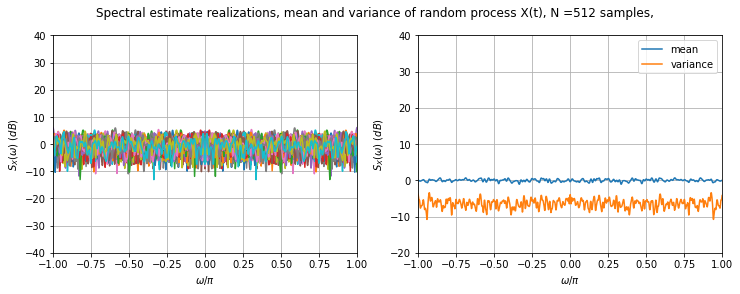

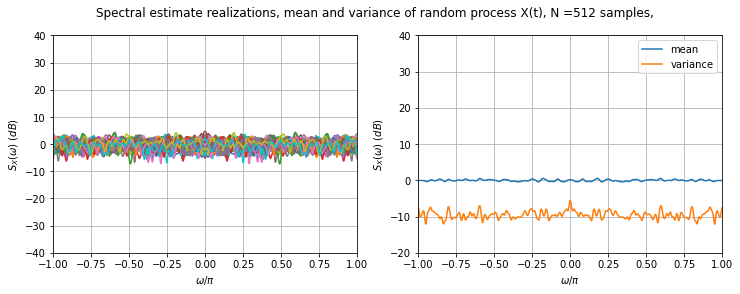

In [16]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
fft = np.fft.fft

# ======================================================================
def plot_realization(x):
# Plots one signal realization
#
# x[R, N] : R realizations of N-sample random process
  
    [R, N] = x.shape
    
    # plot one signal realization
    xabsmax = np.max(abs(x))
    fig = plt.figure(figsize = (10, 4))
    fig.suptitle('A realization of random process X(n), N = ' + str(N) + ' samples')
    plt.stem(range(N), x[1,:])
    plt.xlabel(r'$n$')
    plt.ylabel(r'$x(n)$') 
    plt.axis([-1, N, -1.1*xabsmax, 1.1*xabsmax])
    plt.grid()
    
    return

# ======================================================================
def bartlett(x, K, Nfft):
# Computes Bartlett's spectral estimate of random process realizations
#
# -- Output
# Sx[R, Nfft] : R realizations of spectral estimates over Nfft frequency points in [0, 2*pi] rad/sample
#
# -- Input
# x[R, N] : R realizations of N-sample random process
# K       : number of sections in Bartlett's spectral estimate
# Nfft    : number of FFT points
    
    [R, N] = x.shape
    
# .   
# . <TO BE COMPLETED>
# .
    L = int(np.floor(N/K))
    Sxsec = np.zeros((K, Nfft))
    Sx = np.zeros((R, Nfft))
    for i in range(R):
        for j in range(K):
            Sxsec[j,:] = abs(fft(x[i, j*L: (j+1)*L], Nfft))**2/L
        Sx[i, :] = np.mean(Sxsec, 0)
    return Sx


# ======================================================================
def spectral_bias_variance(Sx, Sx_bounds, info):
# Computes and plots bias and variance of spectral estimate
#
# Sx[R, Nfft] : R realizations of spectral estimates over Nfft frequency points in [0, 2*pi] rad/sample
# Sx_bounds   = [realization_min, realization_max, average_min, average_max]: bounds for spectral representation (dB) 
# info        : a string with additional information to appear in plots (number of segments, overlap, etc.)

    [R, Nfft] = Sx.shape
    
    # plot periodogram realizations - first rearrange data to allow representation in interval [-pi, pi]
    w = np.arange(-Nfft/2, Nfft/2)*2/Nfft 
    Sx = np.concatenate((Sx[:, int(Nfft/2):], Sx[:, :int(Nfft/2)]), 1)  
    
    fig = plt.figure(figsize = (12, 4))
    fig.suptitle('Spectral estimate realizations, mean and variance of random process X(t), N =' 
                        + str(N) + ' samples, ' + info)
    plt.subplot(1, 2, 1)
    
    for i in range(R):
        plt.plot(w, 10*np.log10(Sx[i, :])) 
    
    plt.xlabel(r'$\omega/\pi$')
    plt.ylabel(r'$S_X(\omega)\ (dB)$')
    plt.axis([-1, 1, Sx_bounds[0], Sx_bounds[1]])
    plt.grid()

    # compute average periodogram and variance
    Sx_ave = np.mean(Sx, 0)
    Sx_var = np.var(Sx, 0)
    plt.subplot(1, 2, 2)
    plt.plot(w, 10*np.log10(Sx_ave))   
    plt.plot(w, 10*np.log10(Sx_var))   
    plt.xlabel(r'$\omega/\pi$')
    plt.ylabel(r'$S_X(\omega)\ (dB)$')
    plt.legend(('mean', 'variance'))
    plt.axis([-1, 1, Sx_bounds[2], Sx_bounds[3]])
    plt.grid()

    # average variance over all frequencies
    print(info, '- average variance over all frequencies =',
                  round(10*np.log10(np.mean(Sx_var)), 2), 'dB')
    
    return


# ======================================================================


N = 512      # total length of signal
R = 50       # number of realizations
Nfft = 1024  # FFT length
Sx_bounds = [-40, 40, -20, 40] # bounds for spectral representation (dB) [realization_min, realization_max, average_min, average_max]

# generate random realizations
x = np.zeros((R, N))

# .   
# . <TO BE COMPLETED>
# .
for i in range(R):
    np.random.seed(i);
    x[i, :] = np.random.randn(1, N)
plot_realization(x)
for K in [1, 4, 8]:
    Sx = bartlett(x, K, Nfft)
    spectral_bias_variance(Sx, Sx_bounds, "")
    

## Bartlett's method - resolution

**[HAY96, Example 8.2.5, p. 415]** Repeat the above experiment for the random process:

$$X(n) = A\sin(\omega_1 n + \phi_1) + \sin(\omega_2 n + \phi_2) + \nu(n)$$

where $\omega_1 = 0.4\pi$, $\omega_2 = 0.45\pi$ and $A = \sqrt{10}$. Signal $\nu(n)$ represents a zero-mean unit-variance white noise.

* *Conclude:* What are the effects of the number of sections $K$ on the resolution of Bartlett's spectral estimate? Why?


<ipython-input-16-89d604e8ed4c>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(N), x[1,:])


 - average variance over all frequencies = 10.81 dB
 - average variance over all frequencies = 4.57 dB
 - average variance over all frequencies = 1.56 dB


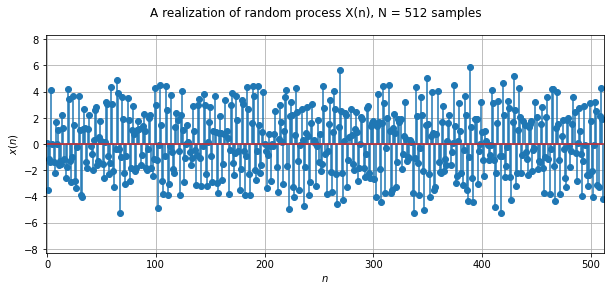

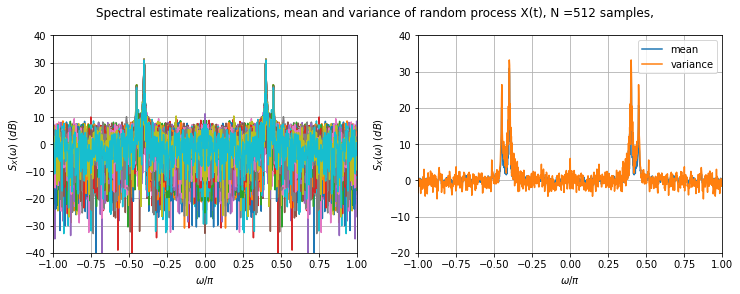

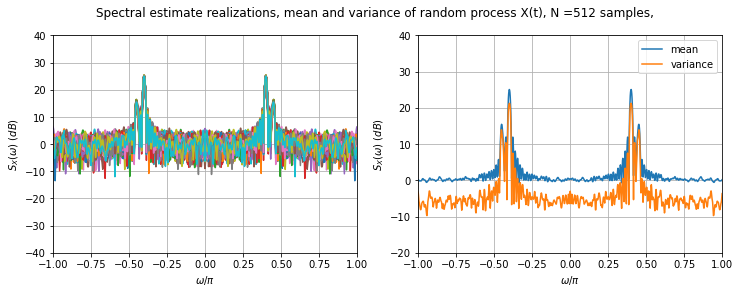

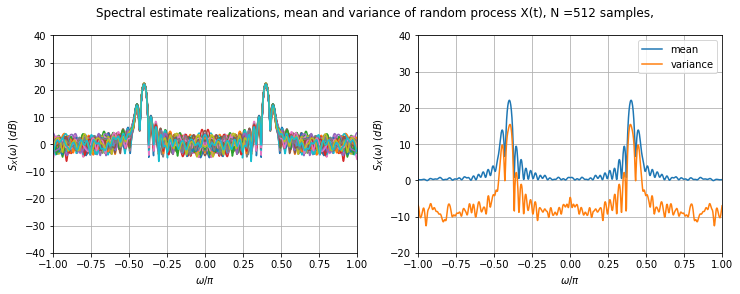

In [17]:
w1 = 0.4*pi
w2 = 0.45*pi
A = np.sqrt(10)
# generate random realizations
x = np.zeros((R, N))
n = np.arange(N)
for i in range(R):
    np.random.seed(i);
    x[i, :] = A*np.sin(w1*n+2*pi*np.random.random())+np.sin(w2*n+2*pi*np.random.random())+np.random.randn(1, N)
plot_realization(x)
for K in [1, 4, 8]:
    Sx = bartlett(x, K, Nfft)
    spectral_bias_variance(Sx, Sx_bounds, "")

## Welch's method - influence of window type and overlap factor

**[HAY96, Example 8.2.6, p. 419]** Repeat the previous experiment (two sinusoids in white noise) using Welch's method with 


* rectangular window and overlap factors:

    * $\Delta = 0$

    * $\Delta = 0.5$
    

* Hamming window and overlap factors:

    * $\Delta = 0$

    * $\Delta = 0.5$
   
keeping the window length to $L = 128$ samples.


*Hint:* Recall that the $L$-point Hamming window can be computed as $w(n) = 0.54 - 0.46\cos(2\pi n/L)$, $n = 0, 1, \dots, L-1$.

 - average variance over all frequencies = 4.57 dB
 - average variance over all frequencies = 3.18 dB
 - average variance over all frequencies = 4.12 dB
 - average variance over all frequencies = 1.92 dB


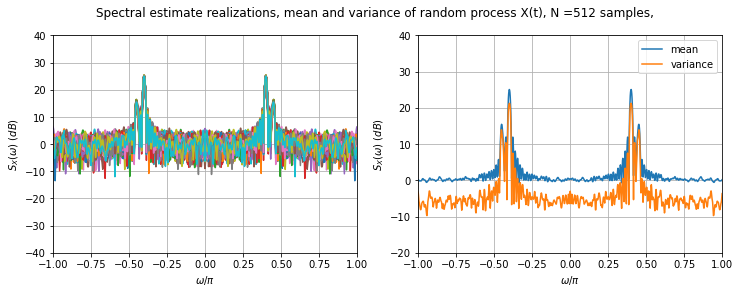

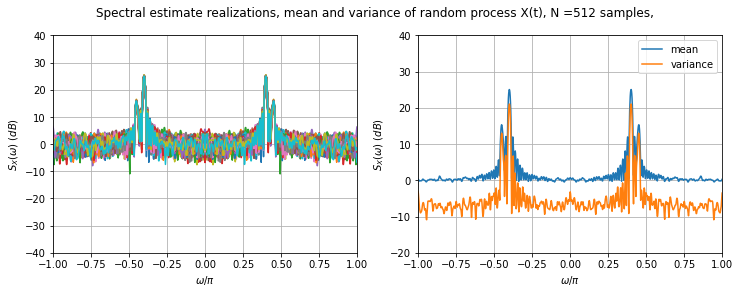

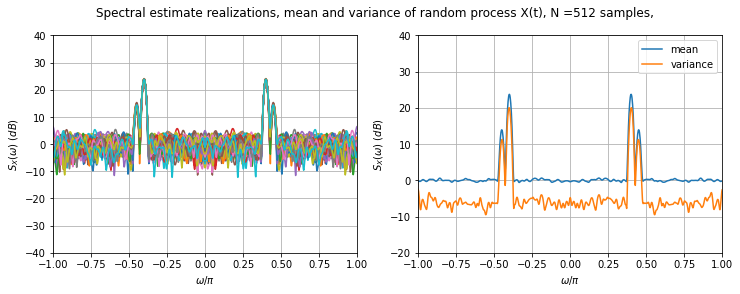

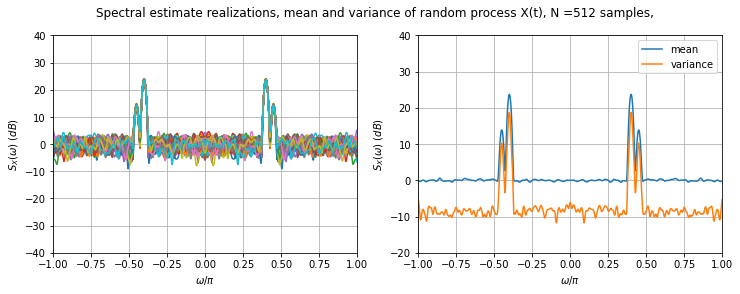

In [19]:
# ======================================================================
def welch(x, window, overlap, Nfft): 
# Computes Welch's spectral estimate of random process realizations
#
# -- Output
# Sx[R, Nfft] : R realizations of spectral estimates over Nfft frequency points in [0, 2*pi] rad/sample
#
# -- Input
# x[R, N] : R realizations of N-sample random process
# window  : data window; size determines segment length L
# overlap : overlapping factor (range [0, 1])
# Nfft    : number of FFT points
    
    [R, N] = x.shape
    
# .   
# . <TO BE COMPLETED>
# .
    L = max(window.shape)
    D = int(np.round(L*(1-overlap)))
    K = int(np.ceil((N-L)/D))+1
    Sxsec = np.zeros((K, Nfft))
    Sx = np.zeros((R, Nfft))
    U = np.sum(abs(window)**2)/L
    for i in range(R):
        for j in range(K):
            Sxsec[j, :] = abs(fft(window*x[i, j*D:(j*D)+L], Nfft))**2/(L*U)
        Sx[i, :] = np.mean(Sxsec, 0)
    return Sx

# ======================================================================


L = 128

# rectangular window
window = np.ones((1, L))

# .   
# . <TO BE COMPLETED>
# .
for overlap in [0, 0.5]:
    Sx = welch(x, window, overlap, Nfft)
    spectral_bias_variance(Sx, Sx_bounds, "")

n = np.arange(0, L)
window = 0.54-0.46*np.cos(2*pi*n/L)
for overlap in [0, 0.5]:
    Sx = welch(x, window, overlap, Nfft)
    spectral_bias_variance(Sx, Sx_bounds, "")

## Conclusions 


* What is the influence of the window type and overlap factor on the resolution and variance of Welch's estimator? How do they compare to those of Bartlett's method?


* Consider in particular the case where Bartlett and Welch estimates use approximately the same number of segments. Check that the resolution and variance are roughly the same for both methods. Then, what do we gain with Welch's method?
